# Covid 19 vs Happines Data Analysis

1. Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Import datasets

In [2]:
#Import Covid Dataset

covid_df=pd.read_csv('datasets/covid19_confirmed.csv')
covid_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,153375,153375,153375,153534,153626,153736,153840,153962,153962,153962
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,149117,150101,150997,151499,152239,153318,154316,155293,156162,157026
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,197308,197659,198004,198313,198645,198962,199275,199560,199822,200068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15055,15055,15055,15069,15070,15070,15078,15083,15083,15083
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,48261,48475,48656,48790,49114,49349,49628,49943,50348,50446
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1750,1759,1870,1878,1960,1974,2059,2059,2166,2166
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,5199919,5202405,5203802,5207695,5211801,5215332,5218993,5221809,5223604,5224534
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,243981,244602,245025,245264,245765,246410,246997,247666,248397,248850
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,483,498,509,528,548,563,587,602,617,630
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,32323,33792,35064,36267,37724,39108,40616,42219,43436,44674


In [3]:
covid_df=covid_df.drop(['Lat', 'Long'], axis=1)
covid_df.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,153375,153375,153375,153534,153626,153736,153840,153962,153962,153962
1,NaN,Albania,0,0,0,0,0,0,0,0,...,149117,150101,150997,151499,152239,153318,154316,155293,156162,157026
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,197308,197659,198004,198313,198645,198962,199275,199560,199822,200068
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,15055,15055,15055,15069,15070,15070,15078,15083,15083,15083
4,NaN,Angola,0,0,0,0,0,0,0,0,...,48261,48475,48656,48790,49114,49349,49628,49943,50348,50446


In [4]:
# Import World Happiness dataset
Happy_world_df=pd.read_csv("https://raw.githubusercontent.com/achyuthkp27/Covid19-Data-Analysis/master/worldwide_happiness_report.csv")
Happy_world_df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
Happy_world_df.drop(['Overall rank','Score','Social support', 'Generosity','Perceptions of corruption'], axis=1, inplace=True )
Happy_world_df.set_index('Country or region', inplace=True)
Happy_world_df.head(5)

,GDP per capita,Healthy life expectancy,Freedom to make life choices
Country or region,,,
Finland,1.340,0.986,0.596
Denmark,1.383,0.996,0.592
Norway,1.488,1.028,0.603
Iceland,1.380,1.026,0.591
Netherlands,1.396,0.999,0.557


In [6]:
Happy_world_df.shape

(156, 3)

3. Visual and tabular representation of the Data per country

In [7]:
#aggregated by country
country_covid_df=covid_df.groupby('Country/Region').sum()
country_covid_df.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,153375,153375,153375,153534,153626,153736,153840,153962,153962,153962
Albania,0,0,0,0,0,0,0,0,0,0,...,149117,150101,150997,151499,152239,153318,154316,155293,156162,157026
Algeria,0,0,0,0,0,0,0,0,0,0,...,197308,197659,198004,198313,198645,198962,199275,199560,199822,200068
Andorra,0,0,0,0,0,0,0,0,0,0,...,15055,15055,15055,15069,15070,15070,15078,15083,15083,15083
Angola,0,0,0,0,0,0,0,0,0,0,...,48261,48475,48656,48790,49114,49349,49628,49943,50348,50446


In [8]:
#locate information for the specific country in tabular form
country=input('Enter the country')
country_covid_df.loc[country]

Enter the countryCanada


1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          1
            ...   
9/8/21     1537294
9/9/21     1541555
9/10/21    1546154
9/11/21    1547067
9/12/21    1549841
Name: Canada, Length: 600, dtype: int64

Enter the 1st countryCanada
Enter the 2snd countryIndia
Enter the 2snd countrySpain


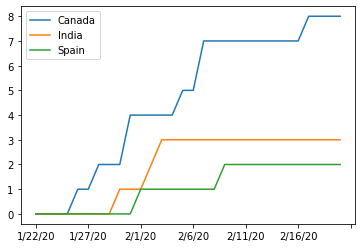

In [9]:
#Plot data for specific 3 countries for the first 30 days
country1=input('Enter the 1st country')
country_covid_df.loc[country1][:30].plot()
country2=input('Enter the 2snd country')
country_covid_df.loc[country2][:30].plot()
country3=input('Enter the 2snd country')
country_covid_df.loc[country3][:30].plot()
plt.legend()

What country?United Kingdom


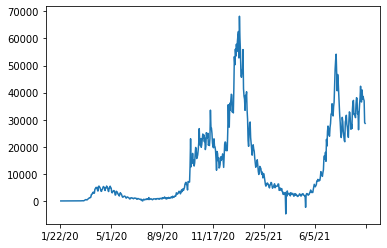

In [10]:
# 1st Derivative (rate of change in cases)
country=input('What country?')
country_covid_df.loc[country].diff().plot()

In [11]:
#Maximum spike of infection in the selected country
country_covid_df.loc[country].diff().max()

68192.0

In [12]:
# Create the list of maximum infection rates throughout all countries
countries=list(country_covid_df.index)
max_rates=[]
for i in countries:
    max_rates.append(country_covid_df.loc[i].diff().max())
country_covid_df['Max Rate']=max_rates

In [13]:
max_rates_df=pd.DataFrame(country_covid_df['Max Rate'])
max_rates_df.head(5)

,Max Rate
Country/Region,
Afghanistan,5721.0
Albania,1239.0
Algeria,1927.0
Andorra,299.0
Angola,405.0


In [14]:
max_rates_df.shape


(195, 1)

4. Merge two datasets together: Covid and Happiness

In [15]:
combo=max_rates_df.join(Happy_world_df, how='inner')
combo.head(5)

,Max Rate,GDP per capita,Healthy life expectancy,Freedom to make life choices
Afghanistan,5721.0,0.350,0.361,0.000
Albania,1239.0,0.947,0.874,0.383
Algeria,1927.0,1.002,0.785,0.086
Argentina,41080.0,1.092,0.881,0.471
Armenia,2476.0,0.850,0.815,0.283


In [16]:
#Correlation matrix
combo.corr()

,Max Rate,GDP per capita,Healthy life expectancy,Freedom to make life choices
Max Rate,1.000000,0.115546,0.081070,-0.046501
GDP per capita,0.115546,1.000000,0.859431,0.394799
Healthy life expectancy,0.081070,0.859431,1.000000,0.423146
Freedom to make life choices,-0.046501,0.394799,0.423146,1.000000


5. Visualization

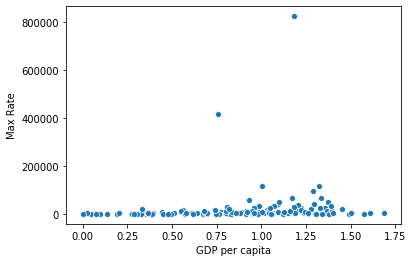

In [17]:
x=combo['GDP per capita']
y=combo['Max Rate']
sns.scatterplot(x,y)

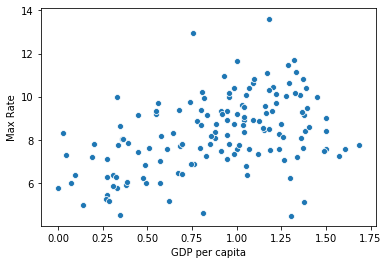

In [18]:
x=combo['GDP per capita']
y=combo['Max Rate']
sns.scatterplot(x,np.log(y))

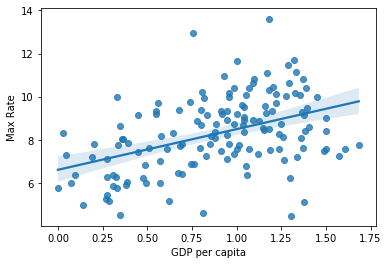

In [19]:
sns.regplot(x, np.log(y))

The correlation matrix shows no significant correlation between max rate and happiness variables

Comments:
The project has been created as an illustration of the skills only.
The data sets used in this project can be obtained from:
https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases/time_series_covid19_confirmed_global.csv
and 
https://raw.githubusercontent.com/achyuthkp27/Covid19-Data-Analysis/master/worldwide_happiness_report.csv